# Simple Linear Regression

In [2]:
# Step 1: Importing Libraries ( Numpy, Matplotlib, Scikit-learn, Pandas, Seaborn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import statsmodels.api as sm
# For OLS(Ordinary Least Squares)Regression
from sklearn.preprocessing import PolynomialFeatures
#For polynomial Transformation

In [3]:
# Step 2: Define the dataset (Experience in years and corresponding salary in $1000s)
np.random.seed(42) # Ensuring reproducibility of random noise
X=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) # Experience
true_salaries= np.array([30,35,40,45,50,55,60,65,70,75]) # Salaries

In [4]:
# Adding some random noise to salaries to reduce accuracy
noise = np.random.normal(0, 5, size=true_salaries.shape)  # Adding Gaussian noise (mean=0, std=5)
Y = true_salaries + noise  # Final dependent variable with noise

# Convert data into Polynomial Features (degree 2 for quadratic relationship)
degree = 2  # You can change this for higher degrees
poly = PolynomialFeatures(degree=degree)  # Creating polynomial feature transformer
X_poly = poly.fit_transform(X)  # Transforming X to polynomial features

In [5]:
# Step 3: Create a Linear Regression Model
model=LinearRegression() #Initialize the Model

In [6]:
# Step 4: Train the model using the dataset
model.fit(X,Y) # The model learns the best-fit line by minimizing the error

LinearRegression()

In [7]:
# Step 5: Get the values of slope (m) and intercept (c) form the trained model
m=model.coef_[0]
c=model.intercept_
print("Coefficients", m)
print("Intercepts", c)

Coefficients 4.965498141580591
Intercepts 27.430065779800536


In [8]:
# Step 6: Display the equation of line
print(f"Equation of the line: Y= {m:.2f}X+{c:.2f}")

Equation of the line: Y= 4.97X+27.43


In [9]:
# Step 7: Predict values using the model
Y_pred = model.predict(X) #Predict salaries for the given experience values

In [10]:
# 1. Mean Absolute Error (MSE) - Measures average absolute difference between actual and predicted values
mae= mean_absolute_error(Y, Y_pred)
print(f"Mean Absolute Error(MAE) : {mae:.2f}")

Mean Absolute Error(MAE) : 2.87


In [11]:
# 2. Mean Squared Error (MSE) - Measures average squared difference between actual and predicted values
mse= mean_squared_error(Y, Y_pred)
print(f"Mean Squared Error(MSE) : {mse:.2f}")

Mean Squared Error(MSE) : 11.75


In [12]:
# 3. Root Mean Squared Error (RMSE) - Measures standard deviation of residuals (errors)
rmse= np.sqrt(mse)
print(f"Root Mean Squared Error(RMSE) : {rmse:.2f}")

Root Mean Squared Error(RMSE) : 3.43


In [13]:
# 4. R-Squared (R²) - Represents how well the model fits the data ( 0 to 1, where 1 is best)
r2= r2_score(Y,Y_pred)
print(f"R - Squared(R²) : {r2:.2f}")

R - Squared(R²) : 0.95


In [14]:
# 5. Adjusted R-Squared ( R²_adj) - Adjusted for the number of predictors, better for multiple regression 
n=len(Y)
p=1
adj_r2=1-((1-r2)*(n-1)/(n-p-1))
print(f"Adjusted R-Sqaured:{adj_r2:.2f}")

Adjusted R-Sqaured:0.94


In [15]:
# 6. Ordinary Least Squares (OLS) Summary - Gives detailed statistical summary of the regression
X_ols = sm.add_constant(X_poly)  # Add intercept term for OLS regression
ols_model = sm.OLS(Y, X_ols).fit()  # Fit OLS model
print("\nOLS Regression Summary:\n")
print(ols_model.summary())  # Display detailed statistical summary


OLS Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 01 Mar 2025   Prob (F-statistic):           3.50e-05
Time:                        15:08:53   Log-Likelihood:                -26.390
No. Observations:                  10   AIC:                             58.78
Df Residuals:                       7   BIC:                             59.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.8348     

C:\Users\sneha\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


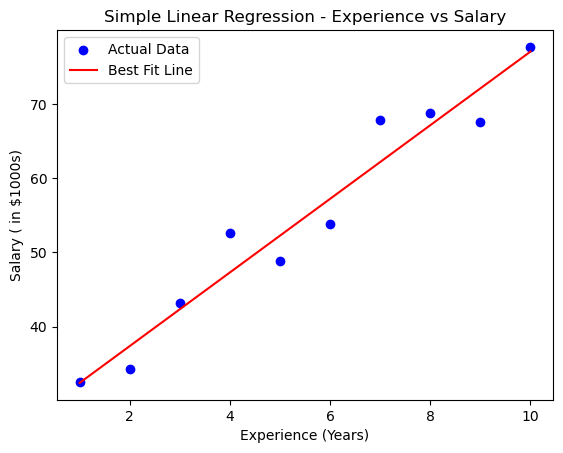

In [16]:
# Step 8: Plot the actual data points
plt.scatter(X,Y,color='blue',label='Actual Data') # Scatter plot of actual values

# Step 9: Plot the Regression Line(Best Fit Line)
plt.plot(X,Y_pred,color='red',label='Best Fit Line') #Regression Line

#Step 10: Add Labels and Legend
plt.xlabel('Experience (Years)') #Label for X-Axis
plt.ylabel('Salary ( in $1000s)') #Label for Y-Axis
plt.title('Simple Linear Regression - Experience vs Salary') #Title of the plot
plt.legend() # Show Legend

#Step 10: Display the graph
plt.show() #Show the final plotted graph

In [17]:
# User gives input as Experience and the model will predict the salary

while True:
    try:
        exp=float(input("Enter the years of Experience to predict the salary( or -1 to exit ):"))
        if exp== -1:
            break
        predicted_salary=model.predict(np.array([[exp]]))[0]
        print(f"Predicted Salary for {exp} years of Experience is : $ {predicted_salary:.2f}K")
    except ValueError:
        print(" Please enter a valid number!")

Enter the years of Experience to predict the salary( or -1 to exit ): 3


Predicted Salary for 3.0 years of Experience is : $ 42.33K


Enter the years of Experience to predict the salary( or -1 to exit ): 1


Predicted Salary for 1.0 years of Experience is : $ 32.40K


Enter the years of Experience to predict the salary( or -1 to exit ): 6


Predicted Salary for 6.0 years of Experience is : $ 57.22K


Enter the years of Experience to predict the salary( or -1 to exit ): 9


Predicted Salary for 9.0 years of Experience is : $ 72.12K


Enter the years of Experience to predict the salary( or -1 to exit ): 10


Predicted Salary for 10.0 years of Experience is : $ 77.09K


Enter the years of Experience to predict the salary( or -1 to exit ): 20


Predicted Salary for 20.0 years of Experience is : $ 126.74K


Enter the years of Experience to predict the salary( or -1 to exit ): -1
